<center>

# Random Forest
## Bonus Lectures - DATA 5600

02 December 2024
</center>

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [3]:
# read in data
roomba = pd.read_csv('roomba_survey.csv')
roomba.head()

,sys_RespNum,sys_StartTime,sys_EndTime,sys_LastQuestion,sys_CBC_CBC1_design,sys_CBC_CBC1_design_info,S1,S1A,S1B,S1C,...,D3Neighborhood,D4MaritalStatus,D4A,D4B,D5Occupation,D5Occupation_11_other,D6Education,D6Education_6_other,D7Ethnicity,D7Ethnicity_7_other
0,2,1456893467,1456893958,Finished,"[[1,1,1,2,1,2,2,1],[2,3,2,2,1,1,2,2],[3,2,1,2,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,2,2,NaN,NaN,8,NaN,3,NaN,2,NaN
1,3,1456893643,1456893998,Finished,"[[1,4,2,1,2,1,1,1],[2,3,1,1,1,2,2,4],[3,1,2,2,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",1,2.0,2.0,1.0,...,2,2,NaN,NaN,1,NaN,5,NaN,3,NaN
2,4,1456893769,1456893998,Finished,"[[1,3,2,2,1,2,1,4],[2,4,1,2,1,2,2,1],[3,1,1,1,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,3,1,NaN,NaN,1,NaN,4,NaN,1,NaN
3,9,1456895699,1456904874,Finished,"[[1,2,2,1,1,1,1,3],[2,1,1,2,2,2,2,1],[3,3,1,1,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,2,3,1.0,5.0,1,NaN,3,NaN,1,NaN
4,23,1456924935,1456925731,Finished,"[[1,1,1,2,1,2,1,4],[2,4,2,1,2,1,2,1],[3,2,2,2,...","{""atts""=>[[1,4,0],[2,2,1],[3,2,1],[4,2,1],[5,2...",4,NaN,NaN,NaN,...,2,1,NaN,NaN,11,retired,2,NaN,1,NaN


In [4]:
roomba.value_counts('S1')

S1
4    229
3     63
1     40
Name: count, dtype: int64

In [5]:
# recode outcome variable
roomba['segment'] = roomba['S1'].map({1: 'own', 3: 'shopping', 4: 'considering'})
roomba['segment'].value_counts()

segment
considering    229
shopping        63
own             40
Name: count, dtype: int64

In [6]:
# X should be all columns that begin with 'ShoppingAttitudes' and "RelatedBehaviors" and D1Gender, D2HomeType, D3Neighborhood, D4MaritalStatus, D6Education
X = roomba.filter(like='ShoppingAttitudes').join(roomba.filter(like='RelatedBehaviors')).join(roomba[['D1Gender', 'D2HomeType', 'D3Neighborhood', 'D4MaritalStatus', 'D6Education']])
y = roomba['segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5600, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(265, 21) (265,)
(67, 21) (67,)


,ShoppingAttitudes_1,ShoppingAttitudes_2,ShoppingAttitudes_3,ShoppingAttitudes_4,ShoppingAttitudes_5,ShoppingAttitudes_6,ShoppingAttitudes_7,RelatedBehaviors_1,RelatedBehaviors_2,RelatedBehaviors_3,...,RelatedBehaviors_5,RelatedBehaviors_6,RelatedBehaviors_7,RelatedBehaviors_8,RelatedBehaviors_9,D1Gender,D2HomeType,D3Neighborhood,D4MaritalStatus,D6Education
254,1,1,0,1,0,0,0,1,1,1,...,0,1,0,0,0,1,1,2,2,2
4,1,1,1,1,1,1,0,1,0,0,...,0,0,1,0,0,2,2,2,1,2
296,1,1,0,1,0,1,0,1,1,0,...,1,1,0,0,0,1,1,2,4,4
47,1,1,1,0,0,1,0,1,1,0,...,1,1,0,0,0,1,1,1,2,1
28,1,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,2,1,2,2,3


### Fit the random forest

In [7]:
# fit a random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6567164179104478

In [ ]:
# fit a random forest model with hyperparameters
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_samples': [None, 0.5, 0.75, 1.0],
    'oob_score': [True, False],
    'warm_start': [True, False],
    'n_jobs': [-1],
    'verbose': [0, 1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 3 folds for each of 2799360 candidates, totalling 8398080 fits


KeyboardInterrupt: 

: 

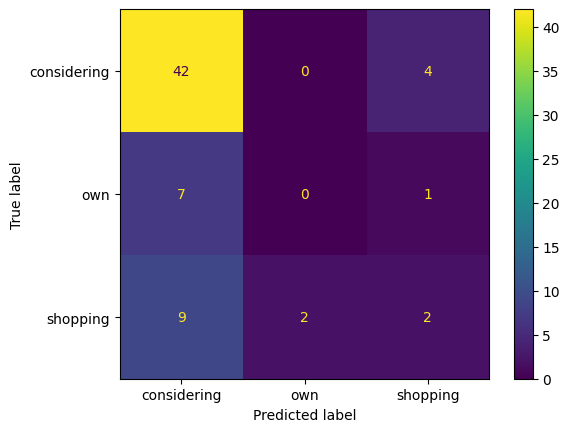

In [ ]:
# plot the confusion matrix with ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_).plot()
plt.title('Confusion Matrix for Original Random Forest')


Text(0.5, 1.0, 'Confusion Matrix for Best Random Forest')

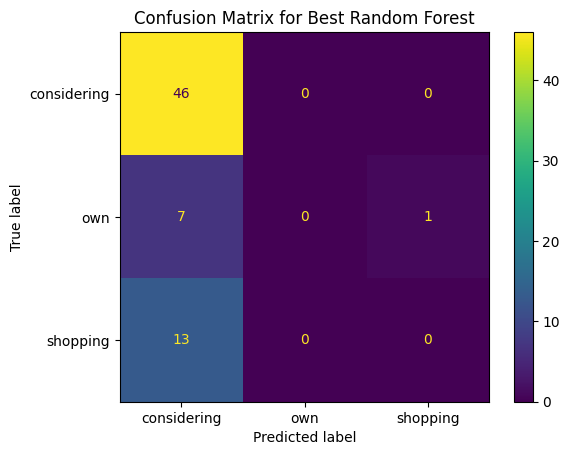

In [11]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=best_rf.classes_).plot()
plt.title('Confusion Matrix for Best Random Forest')
